In [4]:
import os
import pandas as pd
import librosa
from tqdm import tqdm

METADATA_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/filtered_tracks_metadata.csv'
DATASET_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large'
MIN_SAMPLES = 22050 * 30  # Minimum required samples, e.g., 30 seconds at 22050 Hz

def downsample_tracks(metadata_path, downsample_ratios):
    """
    Downsamples tracks for each genre according to specified ratios in metadata only.

    Parameters:
        metadata_path (str): Path to the custom metadata CSV file.
        downsample_ratios (dict): Dictionary with genres as keys and downsampling factors (0-1) as values.

    Returns:
        DataFrame: Downsampled DataFrame of tracks.
    """
    # Load the metadata file
    tracks = pd.read_csv(metadata_path, index_col=0)

    # Initialize an empty list to store downsampled DataFrames
    downsampled_dfs = []

    # Loop through each genre and apply downsampling
    for genre, ratio in downsample_ratios.items():
        genre_tracks = tracks[tracks['primary_genre'] == genre]

        # Downsample if ratio < 1, otherwise keep all tracks
        if ratio < 1:
            num_samples = int(len(genre_tracks) * ratio)
            genre_tracks_downsampled = genre_tracks.sample(num_samples, random_state=42)
            print(f"Downsampled {genre} from {len(genre_tracks)} to {len(genre_tracks_downsampled)} tracks")
        else:
            genre_tracks_downsampled = genre_tracks
            print(f"Kept all tracks for {genre} (total: {len(genre_tracks)})")

        downsampled_dfs.append(genre_tracks_downsampled)

    # Combine all downsampled DataFrames
    downsampled_tracks = pd.concat(downsampled_dfs)

    # Display the final count of tracks per genre
    print("\nNumber of tracks per genre after downsampling:")
    print(downsampled_tracks['primary_genre'].value_counts())

    return downsampled_tracks

# Define downsampling ratios for each genre
# downsample_ratios = {
#     'Electronic': 0.078,
#     'Avant-Garde': 0.175,
#     'Experimental': 0.2,
#     'Rock': 0.225,
#     'Pop': 0.26,
#     'Folk': 0.35,
#     'Hip-Hop': 0.37,
#     'Punk': 0.42,
#     'Noise': 0.44,
#     'Lo-Fi': 0.55,
#     'Experimental Pop': 0.55,
#     'Ambient Electronic': 0.74,
#     'Jazz': 0.86,
#     'Classical': 0.90,
#     'International': 0.95,
#     'Blues': 1.0,  # Keep all for Blues
# }
downsample_ratios = {'Rock': 0.043365,
'Folk' :0.043706,
'Punk' :0.086430,
'Indie-Rock' :0.092081,
'Industrial' :0.114025,
'Blues' :0.151057,
'Post-Rock' :0.168067,
'Singer-Songwriter' :0.180832,
'Psych-Folk' :0.188324,
'Psych-Rock' :0.251889,
'Freak-Folk' :0.278552,
'Post-Punk' :0.286533,
'Country' :0.338983,
'Metal' :0.414938,
'Krautrock' :0.558659,
'Noise-Rock' :0.574713,
}




# Perform downsampling
downsampled_tracks = downsample_tracks(METADATA_PATH, downsample_ratios)

# Optional: Save the downsampled data to a new CSV
downsampled_tracks.to_csv('downsampled_tracks_metadata.csv')





Downsampled Rock from 2306 to 99 tracks
Downsampled Folk from 2288 to 99 tracks
Downsampled Punk from 1157 to 99 tracks
Downsampled Indie-Rock from 1086 to 99 tracks
Downsampled Industrial from 877 to 99 tracks
Downsampled Blues from 662 to 99 tracks
Downsampled Post-Rock from 595 to 99 tracks
Downsampled Singer-Songwriter from 553 to 100 tracks
Downsampled Psych-Folk from 531 to 100 tracks
Downsampled Psych-Rock from 397 to 99 tracks
Downsampled Freak-Folk from 359 to 100 tracks
Downsampled Post-Punk from 349 to 100 tracks
Downsampled Country from 295 to 99 tracks
Downsampled Metal from 241 to 100 tracks
Downsampled Krautrock from 179 to 99 tracks
Downsampled Noise-Rock from 174 to 100 tracks

Number of tracks per genre after downsampling:
primary_genre
Singer-Songwriter    100
Psych-Folk           100
Freak-Folk           100
Post-Punk            100
Metal                100
Noise-Rock           100
Rock                  99
Folk                  99
Punk                  99
Indie-Rock

In [2]:
import pandas as pd
import os
import librosa
from tqdm import tqdm

# Paths and settings
METADATA_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_metadata/fma_metadata/custom_tracks_metadata.csv'
DATASET_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large'
MIN_SAMPLES = 12000 * 30  # Set the minimum sample threshold (e.g., 30 seconds at 22050 Hz)

def filter_short_tracks(metadata_path, dataset_path, min_samples):
    """
    Filters out tracks with a sample count less than the specified threshold.

    Parameters:
        metadata_path (str): Path to the metadata CSV file.
        dataset_path (str): Path to the directory with audio files.
        min_samples (int): Minimum number of samples required for a track to be included.

    Returns:
        DataFrame: Filtered DataFrame of tracks.
    """
    # Load metadata
    tracks = pd.read_csv(metadata_path, index_col=0)

    # List to store valid track IDs
    valid_tracks = []

    # Progress bar for filtering
    print("Filtering tracks by minimum sample requirement...")
    for track_id in tqdm(tracks.index, desc="Checking track length"):
        folder = f"{int(track_id):03d}"[:3]  # Folder based on track_id
        file_path = os.path.join(dataset_path, folder, f"{track_id}.mp3")

        if os.path.isfile(file_path):
            try:
                # Load audio file and check length
                signal, _ = librosa.load(file_path, sr=None)
                if len(signal) >= min_samples:
                    valid_tracks.append(track_id)  # Track meets minimum sample requirement
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    # Filter metadata to include only valid tracks
    filtered_tracks = tracks.loc[valid_tracks]

    # Display the final count of tracks per genre
    print("\nNumber of tracks per genre after filtering:")
    print(filtered_tracks['primary_genre'].value_counts())

    return filtered_tracks

# Apply filtering
filtered_tracks = filter_short_tracks(METADATA_PATH, DATASET_PATH, MIN_SAMPLES)

# Optional: Save the filtered data to a new CSV
filtered_tracks.to_csv('filtered_tracks_metadata.csv')
print("Filtered metadata saved to 'filtered_tracks_metadata.csv'.")


Filtering tracks by minimum sample requirement...


Checking track length:  64%|████████████████████████████████                  | 23137/36133 [00:00<00:00, 37363.89it/s]C:\Users\HASSAN\AppData\Local\Temp\ipykernel_9468\3680279564.py:38: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, _ = librosa.load(file_path, sr=None)
C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\101\101265.mp3: 
Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\101\101272.mp3: 
Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\101\101275.mp3: 


Checking track length:  67%|██████████████████████████████████▊                 | 24220/36133 [00:16<00:22, 534.93it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\105\105247.mp3: 


Checking track length:  68%|███████████████████████████████████▍                | 24632/36133 [00:36<01:07, 169.72it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\106\106409.mp3: 
Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\106\106412.mp3: 
Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\106\106415.mp3: 


Checking track length:  69%|████████████████████████████████████▋                | 25048/36133 [00:56<02:16, 81.46it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\108\108920.mp3: 
Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\108\108925.mp3: 


Checking track length:  74%|███████████████████████████████████████▏             | 26734/36133 [02:15<06:29, 24.13it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\115\115610.mp3: 


Checking track length:  76%|████████████████████████████████████████▏            | 27386/36133 [02:47<06:45, 21.58it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\117\117441.mp3: 


Checking track length:  82%|███████████████████████████████████████████▌         | 29680/36133 [04:36<05:29, 19.56it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\126\126981.mp3: 


Checking track length:  82%|███████████████████████████████████████████▋         | 29785/36133 [04:41<05:26, 19.45it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\127\127336.mp3: 


Checking track length:  83%|████████████████████████████████████████████▏        | 30152/36133 [04:59<05:13, 19.07it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\129\129207.mp3: 


Checking track length:  84%|████████████████████████████████████████████▋        | 30497/36133 [05:17<04:49, 19.44it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\130\130328.mp3: 


Checking track length:  87%|██████████████████████████████████████████████       | 31376/36133 [06:00<04:14, 18.69it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\133\133641.mp3: 


Checking track length:  87%|██████████████████████████████████████████████       | 31380/36133 [06:00<04:15, 18.63it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\133\133647.mp3: 


Checking track length:  93%|█████████████████████████████████████████████████▍   | 33666/36133 [07:55<02:07, 19.40it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\143\143992.mp3: 


Checking track length:  94%|█████████████████████████████████████████████████▋   | 33844/36133 [08:04<01:59, 19.13it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\145\145056.mp3: 


Checking track length: 100%|████████████████████████████████████████████████████▉| 36059/36133 [09:57<00:03, 19.00it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\155\155051.mp3: 


Checking track length: 100%|█████████████████████████████████████████████████████| 36133/36133 [10:00<00:00, 60.12it/s]


Number of tracks per genre after filtering:
primary_genre
Rock                 2306
Folk                 2288
Punk                 1157
Indie-Rock           1086
Industrial            877
Blues                 662
Post-Rock             595
Singer-Songwriter     553
Psych-Folk            531
Psych-Rock            397
Freak-Folk            359
Post-Punk             349
Country               295
Metal                 241
Krautrock             179
Noise-Rock            174
Name: count, dtype: int64
Filtered metadata saved to 'filtered_tracks_metadata.csv'.


In [6]:
import json
import os
import math
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

# Paths (same as your original)
DATASET_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large'
METADATA_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/downsampled_tracks_metadata.csv' 
JSON_PATH = "data_fma.json"
SAMPLE_RATE = 12000
TRACK_DURATION = 30  # seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

def print_genre_counts(metadata_path, target_genres=None):
    """Same as your original function"""
    tracks = pd.read_csv(metadata_path, index_col=0)
    if target_genres:
        tracks = tracks[tracks['primary_genre'].isin(target_genres)]
        print(f"Filtered tracks by target genres: {len(tracks)}")
    genre_counts = tracks['primary_genre'].value_counts()
    print("\nNumber of tracks per genre:")
    print(genre_counts)

def load_metadata(metadata_path, dataset_path, target_genres=None):
    """Same as your original function"""
    tracks = pd.read_csv(metadata_path, index_col=0)
    if target_genres:
        tracks = tracks[tracks['primary_genre'].isin(target_genres)]
        print(f"Filtered tracks by target genres: {len(tracks)}")

    available_tracks = set()
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.endswith('.mp3'):
                track_id = int(os.path.splitext(file)[0])
                available_tracks.add(track_id)

    tracks = tracks[tracks.index.isin(available_tracks)]
    print(f"Tracks after file check: {len(tracks)}")
    return tracks['primary_genre'].dropna()

def save_features(dataset_path, json_path, metadata_path, target_genres, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):
    """
    Modified version of your save_mfcc() that includes all features while maintaining the same structure
    """
    data = {
        "mapping": target_genres,
        "labels": [],
        "mfcc": [],          # Keeps same structure as original
        "other_features": [] # New: Stores all other features
    }

    genre_data = load_metadata(metadata_path, dataset_path, target_genres)
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    with tqdm(total=len(genre_data), desc="Processing files", unit="file") as pbar:
        for track_id, genre in genre_data.items():
            folder = f"{int(track_id):03d}"[:3]
            file_path = os.path.join(dataset_path, folder, f"{track_id}.mp3")
            
            if os.path.isfile(file_path):
                try:
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                    
                    for d in range(num_segments):
                        start = samples_per_segment * d
                        finish = start + samples_per_segment
                        segment = signal[start:finish]
                        
                        if len(segment) < samples_per_segment:
                            segment = np.pad(segment, (0, samples_per_segment - len(segment)), mode='constant')

                        # Extract MFCCs (same as original)
                        mfcc = librosa.feature.mfcc(y=segment, sr=sample_rate,
                                                  n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T
                        
                        # Extract other features (new)
                        other_features = extract_other_features(segment, sample_rate)
                        
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["other_features"].append(other_features)
                            data["labels"].append(target_genres.index(genre))
                        else:
                            print(f"Skipping segment {d} in {file_path} due to unexpected MFCC shape.")

                    pbar.update(1)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
    
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
    print(f"\nFeatures saved to {json_path}")

def extract_other_features(segment, sample_rate):
    """Helper function to extract all non-MFCC features"""
    features = []
    
    # Pitch (Yin algorithm)
    try:
        f0 = librosa.yin(segment, fmin=20, fmax=sample_rate//2)
        f0 = f0[f0 > 0]  # Remove zeros
        features.append(float(np.mean(f0)) if len(f0) > 0 else 0.0)
    except:
        features.append(0.0)
    
    # Tempo
    onset_env = librosa.onset.onset_strength(y=segment, sr=sample_rate)
    tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sample_rate)
    features.append(float(tempo))
    
    # Beats (mean interval)
    _, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sample_rate)
    beats = librosa.frames_to_time(beats, sr=sample_rate)
    if len(beats) > 1:
        features.append(float(np.mean(np.diff(beats))))
    else:
        features.append(0.0)
    
    # Rhythm patterns
    stft = librosa.stft(segment, n_fft=2048, hop_length=512)
    magnitude = np.abs(stft)
    NUM_RHYTHM_BANDS = 6
    band_indices = np.linspace(0, magnitude.shape[0], NUM_RHYTHM_BANDS + 1, dtype=int)
    energy_bands = np.zeros((NUM_RHYTHM_BANDS, magnitude.shape[1]))
    for b in range(NUM_RHYTHM_BANDS):
        energy_bands[b] = np.sum(magnitude[band_indices[b]:band_indices[b+1]], axis=0)
    rhythm_features = []
    for b in range(NUM_RHYTHM_BANDS):
        autocorr = np.correlate(energy_bands[b], energy_bands[b], mode='full')
        rhythm_features.extend(autocorr[len(autocorr)//2:])  # Keep non-negative lags
    features.extend(rhythm_features)
    
    # Chroma features (mean)
    chroma = librosa.feature.chroma_stft(y=segment, sr=sample_rate, n_fft=2048, hop_length=512)
    features.extend(np.mean(chroma, axis=1).tolist())
    
    # RMS dynamics
    rms = librosa.feature.rms(y=segment, frame_length=2048, hop_length=512)[0]
    features.append(float(np.mean(rms)))
    features.append(float(np.std(rms)))
    features.append(float((np.max(rms) - np.min(rms)) / (np.max(rms) + 1e-10)))
    
    return features

def load_data(data_path):
    """Modified to load both MFCCs and other features"""
    with open(data_path, "r") as fp:
        data = json.load(fp)
    
    # MFCCs (same as original)
    X_mfcc = np.array(data["mfcc"])
    
    # Other features (new)
    X_other = np.array(data["other_features"])
    
    y = np.array(data["labels"])
    return X_mfcc, X_other, y

def prepare_datasets(test_size, validation_size):
    """Modified version that maintains your augmentation approach"""
    # Load data
    X_mfcc, X_other, y = load_data(JSON_PATH)
    
    # Split data
    (X_mfcc_train, X_mfcc_test, 
     X_other_train, X_other_test, 
     y_train, y_test) = train_test_split(X_mfcc, X_other, y, test_size=test_size)
    
    (X_mfcc_train, X_mfcc_val, 
     X_other_train, X_other_val, 
     y_train, y_val) = train_test_split(X_mfcc_train, X_other_train, y_train, 
                                      test_size=validation_size)

    # === Data Augmentation (same as your original) ===
    # Reverse MFCCs
    X_mfcc_train_reversed = np.flip(X_mfcc_train, axis=1)
    y_train_reversed = y_train.copy()
    
    # Time shifting
    max_shift = int(0.1 * X_mfcc_train.shape[1])
    X_mfcc_train_shifted = []
    X_other_train_shifted = []
    y_train_shifted = []
    
    for i in range(X_mfcc_train.shape[0]):
        shift = np.random.randint(1, max_shift)
        shifted_mfcc = np.roll(X_mfcc_train[i], shift, axis=1)
        X_mfcc_train_shifted.append(shifted_mfcc)
        X_other_train_shifted.append(X_other_train[i])  # Other features don't get shifted
        y_train_shifted.append(y_train[i])
    
    X_mfcc_train_shifted = np.array(X_mfcc_train_shifted)
    X_other_train_shifted = np.array(X_other_train_shifted)
    y_train_shifted = np.array(y_train_shifted)
    
    # Combine original and augmented data
    X_mfcc_train_augmented = np.concatenate(
        (X_mfcc_train, X_mfcc_train_reversed, X_mfcc_train_shifted), axis=0)
    X_other_train_augmented = np.concatenate(
        (X_other_train, X_other_train, X_other_train_shifted), axis=0)
    y_train_augmented = np.concatenate(
        (y_train, y_train_reversed, y_train_shifted), axis=0)
    
    # Shuffle
    indices = np.arange(X_mfcc_train_augmented.shape[0])
    np.random.shuffle(indices)
    X_mfcc_train_augmented = X_mfcc_train_augmented[indices]
    X_other_train_augmented = X_other_train_augmented[indices]
    y_train_augmented = y_train_augmented[indices]
    
    # Normalize other features
    scaler = StandardScaler()
    X_other_train_augmented = scaler.fit_transform(X_other_train_augmented)
    X_other_val = scaler.transform(X_other_val)
    X_other_test = scaler.transform(X_other_test)
    
    # Add channel dimension to MFCCs
    X_mfcc_train_augmented = X_mfcc_train_augmented[..., np.newaxis]
    X_mfcc_val = X_mfcc_val[..., np.newaxis]
    X_mfcc_test = X_mfcc_test[..., np.newaxis]
    
    return (X_mfcc_train_augmented, X_other_train_augmented), \
           (X_mfcc_val, X_other_val), \
           (X_mfcc_test, X_other_test), \
           y_train_augmented, y_val, y_test

# The rest of your functions (plot_history, predict) remain unchanged

if __name__ == "__main__":
    target_genres = ['Rock',
'Punk',
'Post-Rock',
'Indie-Rock',
'Psych-Rock',
'Noise-Rock',
'Singer-Songwriter',
'Folk',
'Psych-Folk',
'Country',
'Blues',
'Metal',
'Post-Punk',
'Industrial',
'Freak-Folk',
'Krautrock']
    
    # Save features (replaces save_mfcc)
    save_features(DATASET_PATH, JSON_PATH, METADATA_PATH, target_genres=target_genres, num_segments=10)
    
    # Prepare datasets
    (X_mfcc_train, X_other_train), (X_mfcc_val, X_other_val), \
    (X_mfcc_test, X_other_test), y_train, y_val, y_test = prepare_datasets(0.25, 0.2)

Filtered tracks by target genres: 1590
Tracks after file check: 1590


Processing files:   0%|                                                                     | 0/1590 [00:00<?, ?file/s]C:\Users\HASSAN\AppData\Local\Temp\ipykernel_9468\3555773601.py:119: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features.append(float(tempo))
Processing files:   3%|█▌                                                          | 43/1590 [00:13<08:22,  3.08file/s]C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
Processing files: 100%|██████████████████████████████████████████████████████████| 1590/1590 [08:52<00:00,  2.99file/s]



Features saved to data_fma.json


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ mfcc_input (InputLayer)       │ (None, 71, 13, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape (Reshape)             │ (None, 71, 13, 1)         │               0 │ mfcc_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 71, 13, 64)        │             640 │ reshape[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ other_input (InputLayer)      │ (None, 444)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 36, 7, 64)         │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 64)                │          28,480 │ other_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 36, 7, 64)         │             256 │ max_pooling2d[0][0]        │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 64)                │             256 │ dense[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 36, 7, 64)         │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 64)                │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 36, 7, 128)        │          73,856 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 64)                │               0 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 18, 4, 128)        │               0 │ conv2d_1[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 128)               │           8,320 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 18, 4, 128)        │             512 │ max_pooling2d_1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 822,992 (3.14 MB)

 Trainable params: 821,712 (3.13 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/300


C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['mfcc_input', 'other_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


895/895 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.0879 - loss: 3.2955 - val_accuracy: 0.1279 - val_loss: 2.6324
Epoch 2/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.1191 - loss: 2.6829 - val_accuracy: 0.1522 - val_loss: 2.5852
Epoch 3/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.1398 - loss: 2.6157 - val_accuracy: 0.1493 - val_loss: 2.5661
Epoch 4/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.1551 - loss: 2.5770 - val_accuracy: 0.1757 - val_loss: 2.4959
Epoch 5/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.1667 - loss: 2.5389 - val_accuracy: 0.1887 - val_loss: 2.4425
Epoch 6/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.1798 - loss: 2.4989 - val_accuracy: 0.1883 - val_loss: 2.4742
Epoch 7/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.1894 - loss: 2.4633 - val_accuracy: 0.2071 - val_loss: 2.4149
Epoch 8/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.2011 - loss: 2.4280 - val_

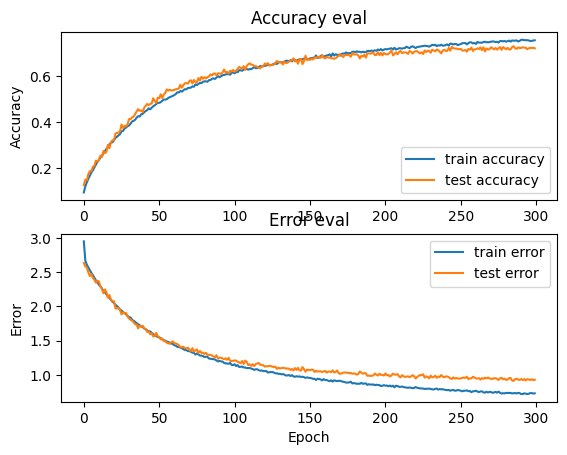

125/125 - 1s - 7ms/step - accuracy: 0.6996 - loss: 1.0037

Test Accuracy: 0.6996
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Target: 12, Predicted label: [12]


In [7]:
import json
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, BatchNormalization, 
                                    Dropout, Dense, Flatten, Concatenate, Reshape, Activation)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras


def build_hybrid_model(mfcc_shape, other_features_shape, num_classes=16):
    """Hybrid model with original CNN structure for MFCCs and Dense network for other features"""
    # --- CNN Branch (MFCCs) ---
    mfcc_input = Input(shape=mfcc_shape, name='mfcc_input')
    
    # Reshape MFCCs to (time_steps, 13, 1) for Conv2D
    x = Reshape((mfcc_shape[0], mfcc_shape[1], 1))(mfcc_input)
    
    # Original CNN architecture
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    
    x = Flatten()(x)
    
    # --- Dense Branch (Other Features) ---
    other_input = Input(shape=(other_features_shape,), name='other_input')
    # Layer 1
    y = Dense(64)(other_input)
    y = BatchNormalization()(y)  # BN before activation
    y = Activation('relu')(y)
    y = Dropout(0.2)(y)
    
    # Layer 2 
    y = Dense(128)(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(0.3)(y)
    
    # Layer 3
    y = Dense(128)(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(0.4)(y)
    
    # --- Combine Branches ---
    combined = Concatenate()([x, y])
    
    # Final classification layers
    z = Dense(256, activation='relu')(combined)
    z = Dropout(0.5)(z)
    output = Dense(num_classes, activation='softmax')(z)
    
    return Model(inputs=[mfcc_input, other_input], outputs=output)

def plot_history(history):
    """Plots accuracy/loss for training/validation as a function of the epochs."""
    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def predict(model, X_mfcc, X_other, y):
    """Predict a single sample using the trained model."""
    X_mfcc = X_mfcc[np.newaxis, ...]
    X_other = X_other[np.newaxis, ...]
    prediction = model.predict([X_mfcc, X_other])
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Target: {y}, Predicted label: {predicted_index}")

if __name__ == "__main__":
    # Define target genres
    target_genres = ['Rock',
'Punk',
'Post-Rock',
'Indie-Rock',
'Psych-Rock',
'Noise-Rock',
'Singer-Songwriter',
'Folk',
'Psych-Folk',
'Country',
'Blues',
'Metal',
'Post-Punk',
'Industrial',
'Freak-Folk',
'Krautrock']

    # Prepare datasets (using your modified prepare_datasets function)
    (X_mfcc_train, X_other_train), (X_mfcc_val, X_other_val), \
    (X_mfcc_test, X_other_test), y_train, y_val, y_test = prepare_datasets(0.25, 0.2)

    # Build model
    mfcc_shape = X_mfcc_train.shape[1:]  # (time_steps, 13)
    other_shape = X_other_train.shape[1]  # num_other_features
    model = build_hybrid_model(mfcc_shape, other_shape)
    
    # Compile with original hyperparameters
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    model.summary()

    # Train with original settings plus early stopping
    history = model.fit(
        [X_mfcc_train, X_other_train], y_train,
        validation_data=([X_mfcc_val, X_other_val], y_val),
        batch_size=32,
        epochs=300,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
        ]
    )

    # Plot training history
    plot_history(history)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate([X_mfcc_test, X_other_test], y_test, verbose=2)
    print(f"\nTest Accuracy: {test_acc:.4f}")

    # Make a sample prediction
    sample_idx = 100  # Example index
    predict(model, X_mfcc_test[sample_idx], X_other_test[sample_idx], y_test[sample_idx])

Unique classes in test set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Number of unique classes: 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Target: 12, Predicted label: [12]
True Genre: Post-Punk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Genre: Post-Punk
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


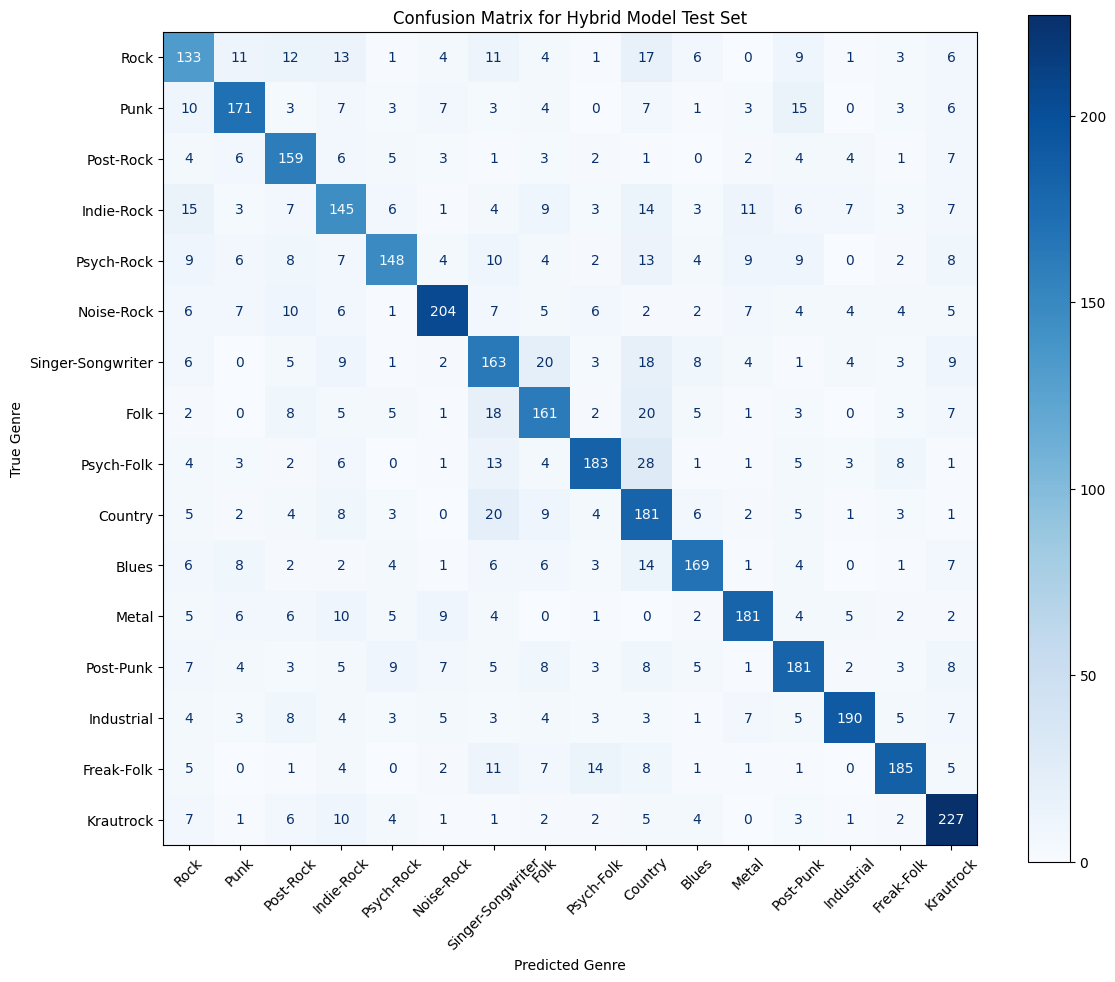


Test Set Accuracy: 69.96%

Classification Report:
                   precision    recall  f1-score   support

             Rock       0.58      0.57      0.58       232
             Punk       0.74      0.70      0.72       243
        Post-Rock       0.65      0.76      0.70       208
       Indie-Rock       0.59      0.59      0.59       244
       Psych-Rock       0.75      0.61      0.67       243
       Noise-Rock       0.81      0.73      0.77       280
Singer-Songwriter       0.58      0.64      0.61       256
             Folk       0.64      0.67      0.66       241
       Psych-Folk       0.79      0.70      0.74       263
          Country       0.53      0.71      0.61       254
            Blues       0.78      0.72      0.75       234
            Metal       0.78      0.75      0.77       242
        Post-Punk       0.70      0.70      0.70       259
       Industrial       0.86      0.75      0.80       255
       Freak-Folk       0.80      0.76      0.78       245
    

In [8]:
target_genres = ['Rock',
'Punk',
'Post-Rock',
'Indie-Rock',
'Psych-Rock',
'Noise-Rock',
'Singer-Songwriter',
'Folk',
'Psych-Folk',
'Country',
'Blues',
'Metal',
'Post-Punk',
'Industrial',
'Freak-Folk',
'Krautrock']
unique_classes = np.unique(y_test)
print(f"Unique classes in test set: {unique_classes}")
print(f"Number of unique classes: {len(unique_classes)}")
# Predict a sample from the test set
sample_idx = 100  # Example index

# For hybrid model (two inputs)
X_mfcc_to_predict = X_mfcc_test[sample_idx]  # MFCC features 
X_other_to_predict = X_other_test[sample_idx]  # Other features
y_to_predict = y_test[sample_idx]

# Use your existing predict function
predict(model, X_mfcc_to_predict, X_other_to_predict, y_to_predict)

# To show genre names instead of indices:
with open(JSON_PATH, "r") as fp:
    genre_labels = json.load(fp)["mapping"]
print(f"True Genre: {genre_labels[y_to_predict]}")
print(f"Predicted Genre: {genre_labels[np.argmax(model.predict([
    X_mfcc_to_predict[np.newaxis, ...],
    X_other_to_predict[np.newaxis, ...]
]), axis=1)[0]]}")

import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load genre labels
with open(JSON_PATH, "r") as fp:
    genre_labels = json.load(fp)["mapping"]

# Generate predictions for the test set (for hybrid model)
y_pred = model.predict([X_mfcc_test, X_other_test])  # Pass both inputs
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))  # Larger size for readability
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=genre_labels
)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)

# Adjust layout and labels
plt.title("Confusion Matrix for Hybrid Model Test Set")
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.tight_layout()  # Prevent label cutoff
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"\nTest Set Accuracy: {accuracy * 100:.2f}%")

# Optional: Print classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, target_names=genre_labels))

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ mfcc_input (InputLayer)       │ (None, 71, 13, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_1 (Reshape)           │ (None, 71, 13, 1)         │               0 │ mfcc_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 71, 13, 64)        │             640 │ reshape_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 36, 7, 64)         │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_6         │ (None, 36, 7, 64)         │             256 │ max_pooling2d_3[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_7 (Dropout)           │ (None, 36, 7, 64)         │               0 │ batch_normalization_6[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 36, 7, 128)        │          73,856 │ dropout_7[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 18, 4, 128)        │               0 │ conv2d_4[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_7         │ (None, 18, 4, 128)        │             512 │ max_pooling2d_4[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_8 (Dropout)           │ (None, 18, 4, 128)        │               0 │ batch_normalization_7[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 18, 4, 128)        │          65,664 │ dropout_8[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ other_input (InputLayer)      │ (None, 444)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_5               │ (None, 9, 2, 128)         │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_2 (Reshape)           │ (None, 71, 13)            │               0 │ mfcc_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 128)               │          56,96

 Total params: 1,002,256 (3.82 MB)

 Trainable params: 1,000,848 (3.82 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/300


C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['mfcc_input', 'other_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


895/895 ━━━━━━━━━━━━━━━━━━━━ 48s 46ms/step - accuracy: 0.0921 - loss: 3.2964 - val_accuracy: 0.1325 - val_loss: 2.6100
Epoch 2/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.1350 - loss: 2.6531 - val_accuracy: 0.1656 - val_loss: 2.5339
Epoch 3/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 0.1469 - loss: 2.5967 - val_accuracy: 0.1769 - val_loss: 2.4836
Epoch 4/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.1648 - loss: 2.5372 - val_accuracy: 0.1920 - val_loss: 2.4140
Epoch 5/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.1866 - loss: 2.4820 - val_accuracy: 0.2180 - val_loss: 2.3502
Epoch 6/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.2005 - loss: 2.4316 - val_accuracy: 0.2184 - val_loss: 2.3496
Epoch 7/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.2199 - loss: 2.3735 - val_accuracy: 0.2365 - val_loss: 2.3661
Epoch 8/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.2396 - loss: 2.3269 - val_

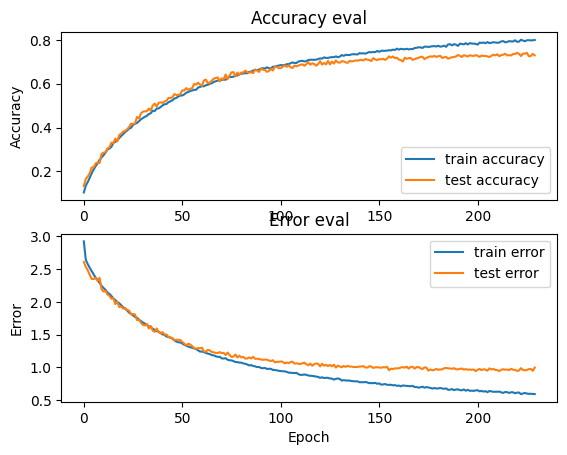

125/125 - 2s - 14ms/step - accuracy: 0.7238 - loss: 0.9477

Test Accuracy: 0.7238
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
Target: 14, Predicted label: [14]


In [9]:
import json
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, BatchNormalization, 
                                    Dropout, Dense, Flatten, Concatenate, Reshape,
                                    Bidirectional, GRU, Activation)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras

def build_hybrid_parallel_model(mfcc_shape, other_features_shape, num_classes=16):
    """Hybrid model with CNN+BGRU for MFCCs and Dense network for other features"""
    
    # --- MFCC Input Branch (CNN + BGRU) ---
    mfcc_input = Input(shape=mfcc_shape, name='mfcc_input')
    
    # Reshape MFCCs to (time_steps, 13, 1) for Conv2D
    x = Reshape((mfcc_shape[0], mfcc_shape[1], 1))(mfcc_input)
    
    # --- CNN Branch ---
    cnn_branch = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    cnn_branch = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(cnn_branch)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = Dropout(0.2)(cnn_branch)
    
    cnn_branch = Conv2D(128, (3, 3), activation='relu', padding='same')(cnn_branch)
    cnn_branch = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(cnn_branch)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = Dropout(0.3)(cnn_branch)
    
    cnn_branch = Conv2D(128, (2, 2), activation='relu', padding='same')(cnn_branch)
    cnn_branch = MaxPooling2D((2, 2), strides=(2, 2), padding='same')(cnn_branch)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = Dropout(0.4)(cnn_branch)
    
    cnn_branch = Flatten()(cnn_branch)
    
    # --- BGRU Branch ---
    time_steps = mfcc_shape[0]
    features = mfcc_shape[1]  # 13 MFCC coefficients
    reshaped_mfcc = Reshape((time_steps, features))(mfcc_input)
    
    bgru_branch = Bidirectional(GRU(128, return_sequences=False))(reshaped_mfcc)
    bgru_branch = BatchNormalization()(bgru_branch)
    bgru_branch = Dropout(0.4)(bgru_branch)
    
    
    
    
    # --- Other Features Branch ---
    other_input = Input(shape=(other_features_shape,), name='other_input')
    other_branch = Dense(128)(other_input)
    other_branch = BatchNormalization()(other_branch)  # BN before activation
    other_branch = Activation('relu')(other_branch)
    other_branch = Dropout(0.4)(other_branch)
    
    # Layer 2 
    

    
    # --- Combine All Branches ---
    combined = Concatenate()([cnn_branch, bgru_branch, other_branch])
    
    # Final classification layers
    dense = Dense(256, activation='relu')(combined)
    dense = Dropout(0.5)(dense)
    output = Dense(num_classes, activation='softmax')(dense)
    
    return Model(inputs=[mfcc_input, other_input], outputs=output)

def plot_history(history):
    """Plots accuracy/loss for training/validation as a function of the epochs."""
    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def predict(model, X_mfcc, X_other, y):
    """Predict a single sample using the trained model."""
    X_mfcc = X_mfcc[np.newaxis, ...]
    X_other = X_other[np.newaxis, ...]
    prediction = model.predict([X_mfcc, X_other])
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Target: {y}, Predicted label: {predicted_index}")

if __name__ == "__main__":
    # Define target genres
    target_genres = ['Rock',
'Punk',
'Post-Rock',
'Indie-Rock',
'Psych-Rock',
'Noise-Rock',
'Singer-Songwriter',
'Folk',
'Psych-Folk',
'Country',
'Blues',
'Metal',
'Post-Punk',
'Industrial',
'Freak-Folk',
'Krautrock']

    # Prepare datasets (using your modified prepare_datasets function)
    (X_mfcc_train, X_other_train), (X_mfcc_val, X_other_val), \
    (X_mfcc_test, X_other_test), y_train, y_val, y_test = prepare_datasets(0.25, 0.2)

    # Build model
    mfcc_shape = X_mfcc_train.shape[1:]  # (time_steps, 13)
    other_shape = X_other_train.shape[1]  # num_other_features
    model = build_hybrid_parallel_model(mfcc_shape, other_shape)
    
    # Compile with original hyperparameters
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    model.summary()

    # Train with original settings plus early stopping
    history = model.fit(
        [X_mfcc_train, X_other_train], y_train,
        validation_data=([X_mfcc_val, X_other_val], y_val),
        batch_size=32,
        epochs=300,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
        ]
    )

    # Plot training history
    plot_history(history)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate([X_mfcc_test, X_other_test], y_test, verbose=2)
    print(f"\nTest Accuracy: {test_acc:.4f}")

    # Make a sample prediction
    sample_idx = 100  # Example index
    predict(model, X_mfcc_test[sample_idx], X_other_test[sample_idx], y_test[sample_idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Target: 14, Predicted label: [14]
True Genre: Freak-Folk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Genre: Freak-Folk
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


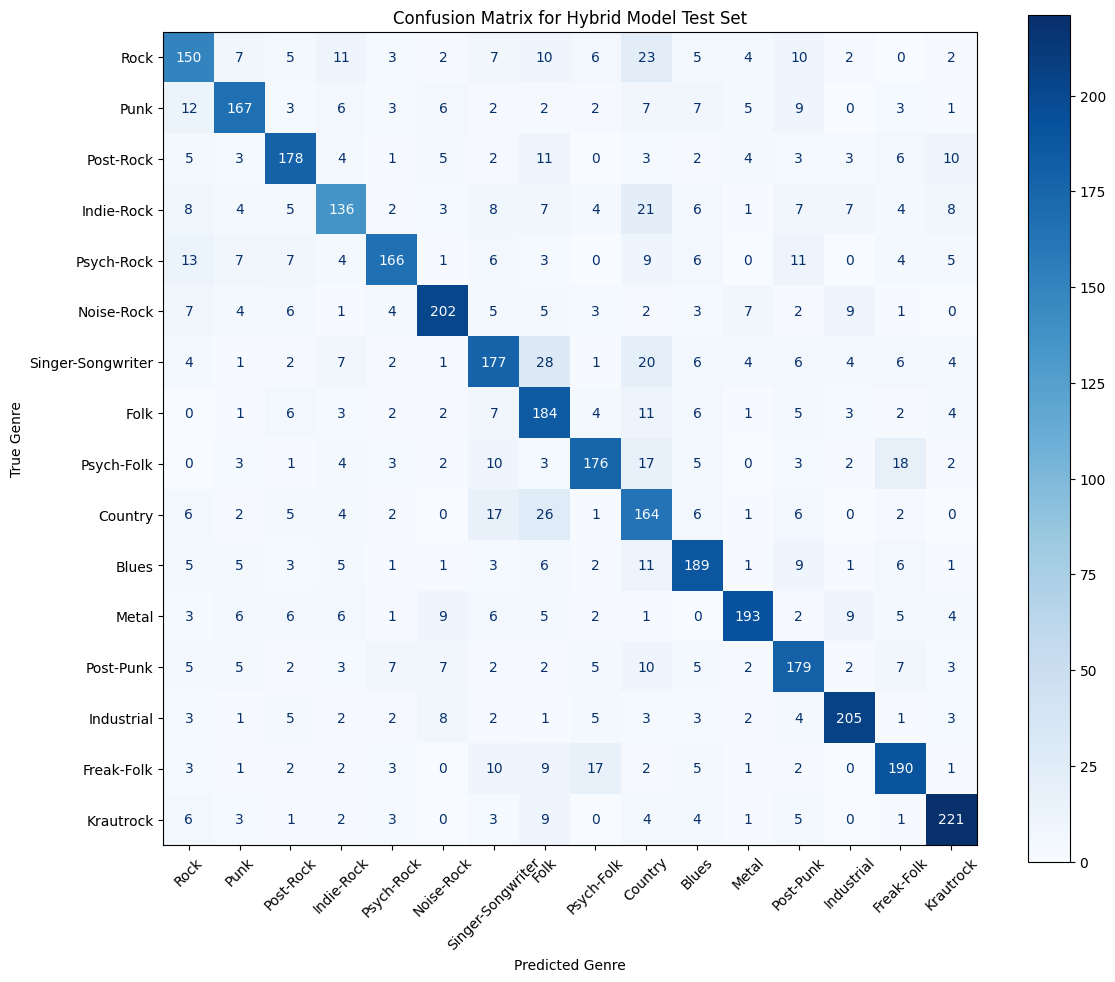


Test Set Accuracy: 72.38%

Classification Report:
                   precision    recall  f1-score   support

             Rock       0.65      0.61      0.63       247
             Punk       0.76      0.71      0.73       235
        Post-Rock       0.75      0.74      0.75       240
       Indie-Rock       0.68      0.59      0.63       231
       Psych-Rock       0.81      0.69      0.74       242
       Noise-Rock       0.81      0.77      0.79       261
Singer-Songwriter       0.66      0.65      0.66       273
             Folk       0.59      0.76      0.67       241
       Psych-Folk       0.77      0.71      0.74       249
          Country       0.53      0.68      0.60       242
            Blues       0.73      0.76      0.75       249
            Metal       0.85      0.75      0.80       258
        Post-Punk       0.68      0.73      0.70       246
       Industrial       0.83      0.82      0.82       250
       Freak-Folk       0.74      0.77      0.75       248
    

In [10]:
# Predict a sample from the test set
sample_idx = 100  # Example index

# For hybrid model (two inputs)
X_mfcc_to_predict = X_mfcc_test[sample_idx]  # MFCC features 
X_other_to_predict = X_other_test[sample_idx]  # Other features
y_to_predict = y_test[sample_idx]

# Use your existing predict function
predict(model, X_mfcc_to_predict, X_other_to_predict, y_to_predict)

# To show genre names instead of indices:
with open(JSON_PATH, "r") as fp:
    genre_labels = json.load(fp)["mapping"]
print(f"True Genre: {genre_labels[y_to_predict]}")
print(f"Predicted Genre: {genre_labels[np.argmax(model.predict([
    X_mfcc_to_predict[np.newaxis, ...],
    X_other_to_predict[np.newaxis, ...]
]), axis=1)[0]]}")

import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load genre labels
with open(JSON_PATH, "r") as fp:
    genre_labels = json.load(fp)["mapping"]

# Generate predictions for the test set (for hybrid model)
y_pred = model.predict([X_mfcc_test, X_other_test])  # Pass both inputs
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))  # Larger size for readability
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=genre_labels
)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)

# Adjust layout and labels
plt.title("Confusion Matrix for Hybrid Model Test Set")
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.tight_layout()  # Prevent label cutoff
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"\nTest Set Accuracy: {accuracy * 100:.2f}%")

# Optional: Print classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, target_names=genre_labels))

MFCC train shape: (28620, 71, 13), Other features train shape: (28620, 444)
MFCC val shape: (2385, 71, 13), Other features val shape: (2385, 444)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ mfcc_input (InputLayer)       │ (None, 71, 13)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_13 (Dropout)          │ (None, 71, 13)            │               0 │ mfcc_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ masked_conditional            │ (None, 71, 220)           │          25,960 │ dropout_13[0][0]           │
│ (MaskedConditional)           │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_11        │ (None, 71, 220)           │             880 │ masked_conditional[0][0]   │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ p_re_lu (PReLU)               │ (None, 71, 220)           │             220 │ batch_normalization_11[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_14 (Dropout)          │ (None, 71, 220)           │               0 │ p_re_lu[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ masked_conditional_1          │ (None, 71, 200)           │         396,200 │ dropout_14[0][0]           │
│ (MaskedConditional)           │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_12        │ (None, 71, 200)           │             800 │ masked_conditional_1[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ other_features_input          │ (None, 444)               │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ p_re_lu_1 (PReLU)             │ (None, 71, 200)           │             200 │ batch_normalization_12[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_16 (Dropout)          │ (None, 444)               │               0 │ other_features_input[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_15 (Dropout)          │ (None, 71, 200)           │               0 │ p_re_lu_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 128)               │          56,960 │ dropout_16[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ masked_conditional_2          │ (None, 71, 180)           │         324,180 │ dropout_15[0][0]           │
│ (MaskedConditional)           │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 828,704 (3.16 MB)

 Trainable params: 826,988 (3.15 MB)

 Non-trainable params: 1,716 (6.70 KB)

Epoch 1/300


C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['mfcc_input', 'other_features_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


895/895 ━━━━━━━━━━━━━━━━━━━━ 47s 46ms/step - accuracy: 0.1195 - loss: 2.8021 - val_accuracy: 0.2180 - val_loss: 2.4258 - learning_rate: 1.0000e-04
Epoch 2/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.1828 - loss: 2.5021 - val_accuracy: 0.2700 - val_loss: 2.2787 - learning_rate: 1.0000e-04
Epoch 3/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.2173 - loss: 2.4168 - val_accuracy: 0.2784 - val_loss: 2.2234 - learning_rate: 1.0000e-04
Epoch 4/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.2394 - loss: 2.3486 - val_accuracy: 0.3124 - val_loss: 2.1649 - learning_rate: 1.0000e-04
Epoch 5/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.2547 - loss: 2.3067 - val_accuracy: 0.3392 - val_loss: 2.1171 - learning_rate: 1.0000e-04
Epoch 6/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.2686 - loss: 2.2533 - val_accuracy: 0.3522 - val_loss: 2.0677 - learning_rate: 1.0000e-04
Epoch 7/300
895/895 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - a

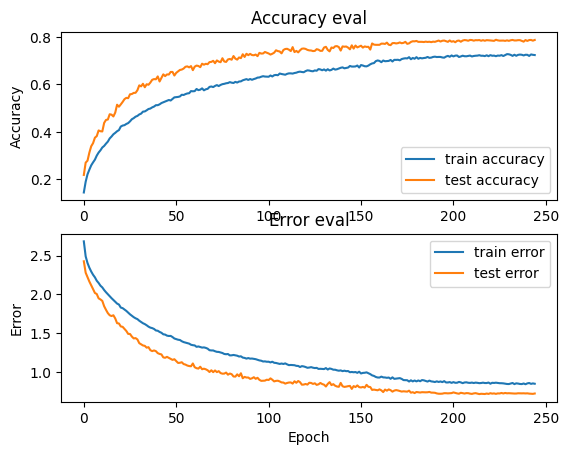

TypeError: predict() missing 1 required positional argument: 'y'

In [11]:
import json
import os
import math
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D, Activation, Concatenate
from tensorflow.keras.layers import PReLU, Layer, BatchNormalization
from tqdm import tqdm
import tensorflow as tf

# Configurations - Added USE_BATCH_NORM flag
class Config:
    MCLNN_LAYER_COUNT = 3
    DENSE_LAYER_COUNT = 2
    TOTAL_LAYER_COUNT = MCLNN_LAYER_COUNT + DENSE_LAYER_COUNT
    HIDDEN_NODES_LIST = [220, 200, 180]
    OTHER_FEATURES_NODES = [128, 64]
    DENSE_NODES = [50, 16]
    MASK_BANDWIDTH = [40, 10, 5]
    MASK_OVERLAP = [-10, 3, 1]
    LAYERS_ORDER_LIST = [4, 4, 4]
    LAYER_IS_MASKED = [True, True, True]
    DROPOUT = [0.01, 0.4, 0.2, 0.1, 0.2]
    OTHER_FEATURES_DROPOUT = [0.15, 0.15]
    WEIGHT_INITIALIZATION = ['he_normal', 'he_normal', 'he_normal', 'glorot_uniform', 'glorot_uniform']
    LEARNING_RATE = 0.0001
    USE_BATCH_NORM = True  # New flag to control batch normalization

# MaskedConditional Layer (unchanged)
class MaskedConditional(Layer):
    def __init__(self, output_dim, init='glorot_uniform', order=5, bandwidth=1, overlap=0, layer_is_masked=True, **kwargs):
        super(MaskedConditional, self).__init__(**kwargs)
        self.output_dim = output_dim
        self.init = keras.initializers.get(init)
        self.order = order
        self.bandwidth = bandwidth
        self.overlap = overlap
        self.layer_is_masked = layer_is_masked

    def build(self, input_shape):
        input_dim = input_shape[-1]
        kernel_size = self.order * 2 + 1
        self.kernel_size = kernel_size

        self.W = self.add_weight(
            shape=(kernel_size, input_dim, self.output_dim),
            initializer=self.init,
            trainable=True,
            name='weights'
        )
        self.b = self.add_weight(
            shape=(self.output_dim,),
            initializer='zeros',
            trainable=True,
            name='bias'
        )

        self.weightmask = self.construct_mask(
            input_dim, self.output_dim, self.bandwidth, self.overlap, self.layer_is_masked
        )
        self.weightmask = tf.expand_dims(self.weightmask, axis=0)
        self.weightmask = tf.tile(self.weightmask, [kernel_size, 1, 1])
        self.W.assign(self.W * self.weightmask)

        super(MaskedConditional, self).build(input_shape)

    def construct_mask(self, feature_count, hidden_count, bandwidth, overlap, layer_is_masked):
        bw = bandwidth
        ov = overlap
        l = feature_count
        e = hidden_count

        a = np.arange(1, bw + 1)
        g = np.arange(1, int(np.ceil((l * e) / (l + bw - ov))) + 1)

        if not layer_is_masked:
            binary_mask = np.ones([l, e])
        else:
            mask = np.zeros([l, e])
            flat_matrix = mask.flatten('F')

            for i in range(len(a)):
                for j in range(len(g)):
                    lx = a[i] + (g[j] - 1) * (l + bw - ov)
                    if lx <= l * e:
                        flat_matrix[lx - 1] = 1

            binary_mask = np.transpose(flat_matrix.reshape(e, l))

        return binary_mask.astype(np.float32)

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        sequence_length = tf.shape(inputs)[1]
        feature_count = tf.shape(inputs)[2]

        padding = self.order
        padded_inputs = tf.pad(inputs, [[0, 0], [padding, padding], [0, 0]], mode='CONSTANT')

        outputs = tf.nn.conv1d(padded_inputs, self.W, stride=1, padding='VALID')
        outputs = outputs + self.b
        return outputs

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1], self.output_dim)

# Updated build_parallel_model with BatchNormalization
def build_parallel_model(mfcc_shape, other_features_dim, num_classes=16):
    # MFCC input branch
    mfcc_input = Input(shape=(mfcc_shape[0], mfcc_shape[1]), name='mfcc_input')
    x_mfcc = mfcc_input
    
    # Other features input branch
    other_input = Input(shape=(other_features_dim,), name='other_features_input')
    x_other = other_input
    
    # Process MFCC features through MCLNN layers with BatchNorm
    for layer_index in range(Config.MCLNN_LAYER_COUNT):
        x_mfcc = Dropout(Config.DROPOUT[layer_index])(x_mfcc)
        x_mfcc = MaskedConditional(
            init=Config.WEIGHT_INITIALIZATION[layer_index],
            output_dim=Config.HIDDEN_NODES_LIST[layer_index],
            order=Config.LAYERS_ORDER_LIST[layer_index],
            bandwidth=Config.MASK_BANDWIDTH[layer_index],
            overlap=Config.MASK_OVERLAP[layer_index],
            layer_is_masked=Config.LAYER_IS_MASKED[layer_index]
        )(x_mfcc)
        if Config.USE_BATCH_NORM:
            x_mfcc = BatchNormalization()(x_mfcc)
        x_mfcc = PReLU(shared_axes=[1])(x_mfcc)
    
    # Process other features through dense layers with BatchNorm
    for i, nodes in enumerate(Config.OTHER_FEATURES_NODES):
        x_other = Dropout(Config.OTHER_FEATURES_DROPOUT[i])(x_other)
        x_other = Dense(nodes, activation='relu')(x_other)
        if Config.USE_BATCH_NORM:
            x_other = BatchNormalization()(x_other)
    
    # Global pooling for MFCC features
    mfcc_features = GlobalAveragePooling1D()(x_mfcc)
    
    # Concatenate both feature streams
    combined = Concatenate()([mfcc_features, x_other])
    
    # Add final dense layers with BatchNorm
    for i in range(Config.DENSE_LAYER_COUNT):
        combined = Dropout(Config.DROPOUT[i + Config.MCLNN_LAYER_COUNT])(combined)
        combined = Dense(
            units=Config.DENSE_NODES[i],
            kernel_initializer=Config.WEIGHT_INITIALIZATION[i + Config.MCLNN_LAYER_COUNT]
        )(combined)
        if Config.USE_BATCH_NORM:
            combined = BatchNormalization()(combined)
        if i < Config.DENSE_LAYER_COUNT - 1:
            combined = PReLU()(combined)
        else:
            combined = Activation('softmax')(combined)
    
    model = Model(inputs=[mfcc_input, other_input], outputs=combined)
    optimiser = keras.optimizers.Adam(learning_rate=Config.LEARNING_RATE)
    model.compile(optimizer=optimiser, 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

# Main execution remains the same
if __name__ == "__main__":
    # Prepare datasets (now returns both MFCC and other features)
    (X_mfcc_train, X_other_train), (X_mfcc_val, X_other_val), \
    (X_mfcc_test, X_other_test), y_train, y_val, y_test = prepare_datasets(0.25, 0.2)

    # Squeeze the last dimension if it's 1 (remove unnecessary channels dimension)
    X_mfcc_train = X_mfcc_train.squeeze(-1)
    X_mfcc_val = X_mfcc_val.squeeze(-1)
    X_mfcc_test = X_mfcc_test.squeeze(-1)

    print(f"MFCC train shape: {X_mfcc_train.shape}, Other features train shape: {X_other_train.shape}")
    print(f"MFCC val shape: {X_mfcc_val.shape}, Other features val shape: {X_other_val.shape}")

    # Build and compile the model
    mfcc_shape = (X_mfcc_train.shape[1], X_mfcc_train.shape[2])
    other_features_dim = X_other_train.shape[1]
    model = build_parallel_model(mfcc_shape, other_features_dim)
    model.summary()

    # Add callbacks
    callbacks = [
        keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=10)
    ]

    # Train the model
    history = model.fit(
        [X_mfcc_train, X_other_train], y_train,
        validation_data=([X_mfcc_val, X_other_val], y_val),
        batch_size=32,
        epochs=300,
        callbacks=callbacks
    )

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate([X_mfcc_test, X_other_test], y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    plot_history(history)
    
    # Predict a sample from the test set
    X_mfcc_to_predict = X_mfcc_test[100][np.newaxis, ...]
    X_other_to_predict = X_other_test[100][np.newaxis, ...]
    y_to_predict = y_test[100]
    predict(model, [X_mfcc_to_predict, X_other_to_predict], y_to_predict)


True Genre: Industrial
Predicted Genre: Industrial
Confidence: 80.87%
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


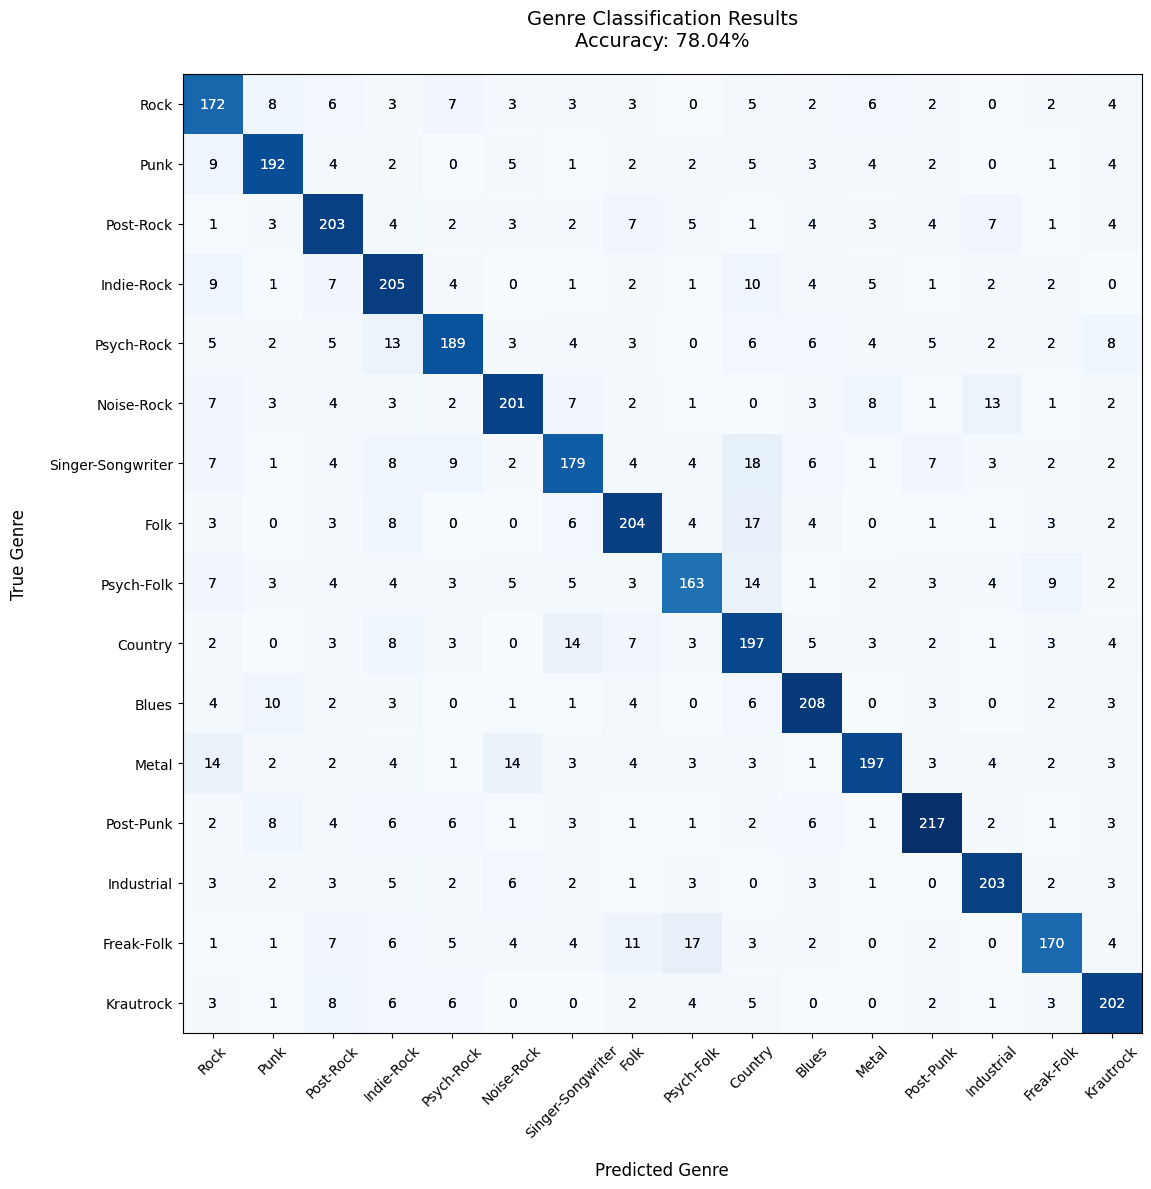


Class-wise Performance:
Rock: 76.11% (226 samples)
Punk: 81.36% (236 samples)
Post-Rock: 79.92% (254 samples)
Indie-Rock: 80.71% (254 samples)
Psych-Rock: 73.54% (257 samples)
Noise-Rock: 77.91% (258 samples)
Singer-Songwriter: 69.65% (257 samples)
Folk: 79.69% (256 samples)
Psych-Folk: 70.26% (232 samples)
Country: 77.25% (255 samples)
Blues: 84.21% (247 samples)
Metal: 75.77% (260 samples)
Post-Punk: 82.20% (264 samples)
Industrial: 84.94% (239 samples)
Freak-Folk: 71.73% (237 samples)
Krautrock: 83.13% (243 samples)


In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# ================================================
# Load genre labels FIRST (before any plotting)
# ================================================
with open(JSON_PATH, "r") as fp:
    data = json.load(fp)
    genre_labels = data["mapping"]

# ================================================
# Single Sample Prediction Function
# ================================================
def predict(model, X_mfcc, X_other, y_true, genre_labels):
    # Reshape for batch prediction
    X_mfcc_batch = np.expand_dims(X_mfcc, axis=0)  # Shape: (1, timesteps, mfcc_features)
    X_other_batch = np.expand_dims(X_other, axis=0)  # Shape: (1, other_features_dim)
    
    # Get prediction
    prediction = model.predict([X_mfcc_batch, X_other_batch], verbose=0)
    predicted_label = np.argmax(prediction)
    
    print(f"\nTrue Genre: {genre_labels[y_true]}")
    print(f"Predicted Genre: {genre_labels[predicted_label]}")
    print(f"Confidence: {np.max(prediction) * 100:.2f}%")
    return predicted_label

# ================================================
# Test Prediction Example
# ================================================
sample_idx = 100  # Example index
predict(model, 
        X_mfcc_test[sample_idx], 
        X_other_test[sample_idx], 
        y_test[sample_idx],
        genre_labels)

# ================================================
# Full Test Set Evaluation
# ================================================
# Generate predictions
y_pred = model.predict([X_mfcc_test, X_other_test], verbose=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_labels)
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Enhanced Confusion Matrix Plot
plt.figure(figsize=(14, 12))
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=genre_labels
)
disp.plot(
    cmap='Blues',
    ax=plt.gca(),
    xticks_rotation=45,
    values_format='d',
    colorbar=False
)

# Formatting
plt.title(f"Genre Classification Results\nAccuracy: {accuracy:.2%}", pad=20, fontsize=14)
plt.xlabel("Predicted Genre", fontsize=12, labelpad=15)
plt.ylabel("True Genre", fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Add accuracy text
for i in range(len(genre_labels)):
    for j in range(len(genre_labels)):
        plt.text(j, i, conf_matrix[i, j],
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max()/2 else "black")

plt.tight_layout()
plt.show()

# Print class-wise accuracy
print("\nClass-wise Performance:")
for i, genre in enumerate(genre_labels):
    idx = y_test == i
    if sum(idx) > 0:  # Avoid division by zero
        acc = accuracy_score(y_test[idx], y_pred_labels[idx])
        print(f"{genre}: {acc:.2%} ({sum(idx)} samples)")

In [3]:
import json
import os
import math
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tqdm import tqdm
import json
import os
import math
import librosa

In [3]:
import pandas as pd

# Track counts per genre
genre_counts = {'Rock': 2306,
'Folk' :2288,
'Punk' :1157,
'Indie-Rock' :1086,
'Industrial' :877,
'Blues' :662,
'Post-Rock' :595,
'Singer-Songwriter' :553,
'Psych-Folk' :531,
'Psych-Rock' :397,
'Freak-Folk' :359,
'Post-Punk' :349,
'Country' :295,
'Metal' :241,
'Krautrock' :179,
'Noise-Rock' :174,
}

# Target number of tracks per genre
target_tracks = 100


# Calculate multiplier for each genre
multipliers = {genre: target_tracks / count for genre, count in genre_counts.items()}

# Display the result
multipliers_df = pd.DataFrame(list(multipliers.items()), columns=["Genre", "Multiplier"])
print(multipliers_df)


                Genre  Multiplier
0                Rock    0.043365
1                Folk    0.043706
2                Punk    0.086430
3          Indie-Rock    0.092081
4          Industrial    0.114025
5               Blues    0.151057
6           Post-Rock    0.168067
7   Singer-Songwriter    0.180832
8          Psych-Folk    0.188324
9          Psych-Rock    0.251889
10         Freak-Folk    0.278552
11          Post-Punk    0.286533
12            Country    0.338983
13              Metal    0.414938
14          Krautrock    0.558659
15         Noise-Rock    0.574713
